# Imports

In [26]:
import wrangle as w
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
telco_df = w.get_telco_data()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
reload(w)

<module 'wrangle' from '/Users/woody/codeup-data-science/project-1/wrangle.py'>

# Train/Validate/Test split

In [27]:

train, validate, test = w.prep_telco(telco_df)


# Exploration

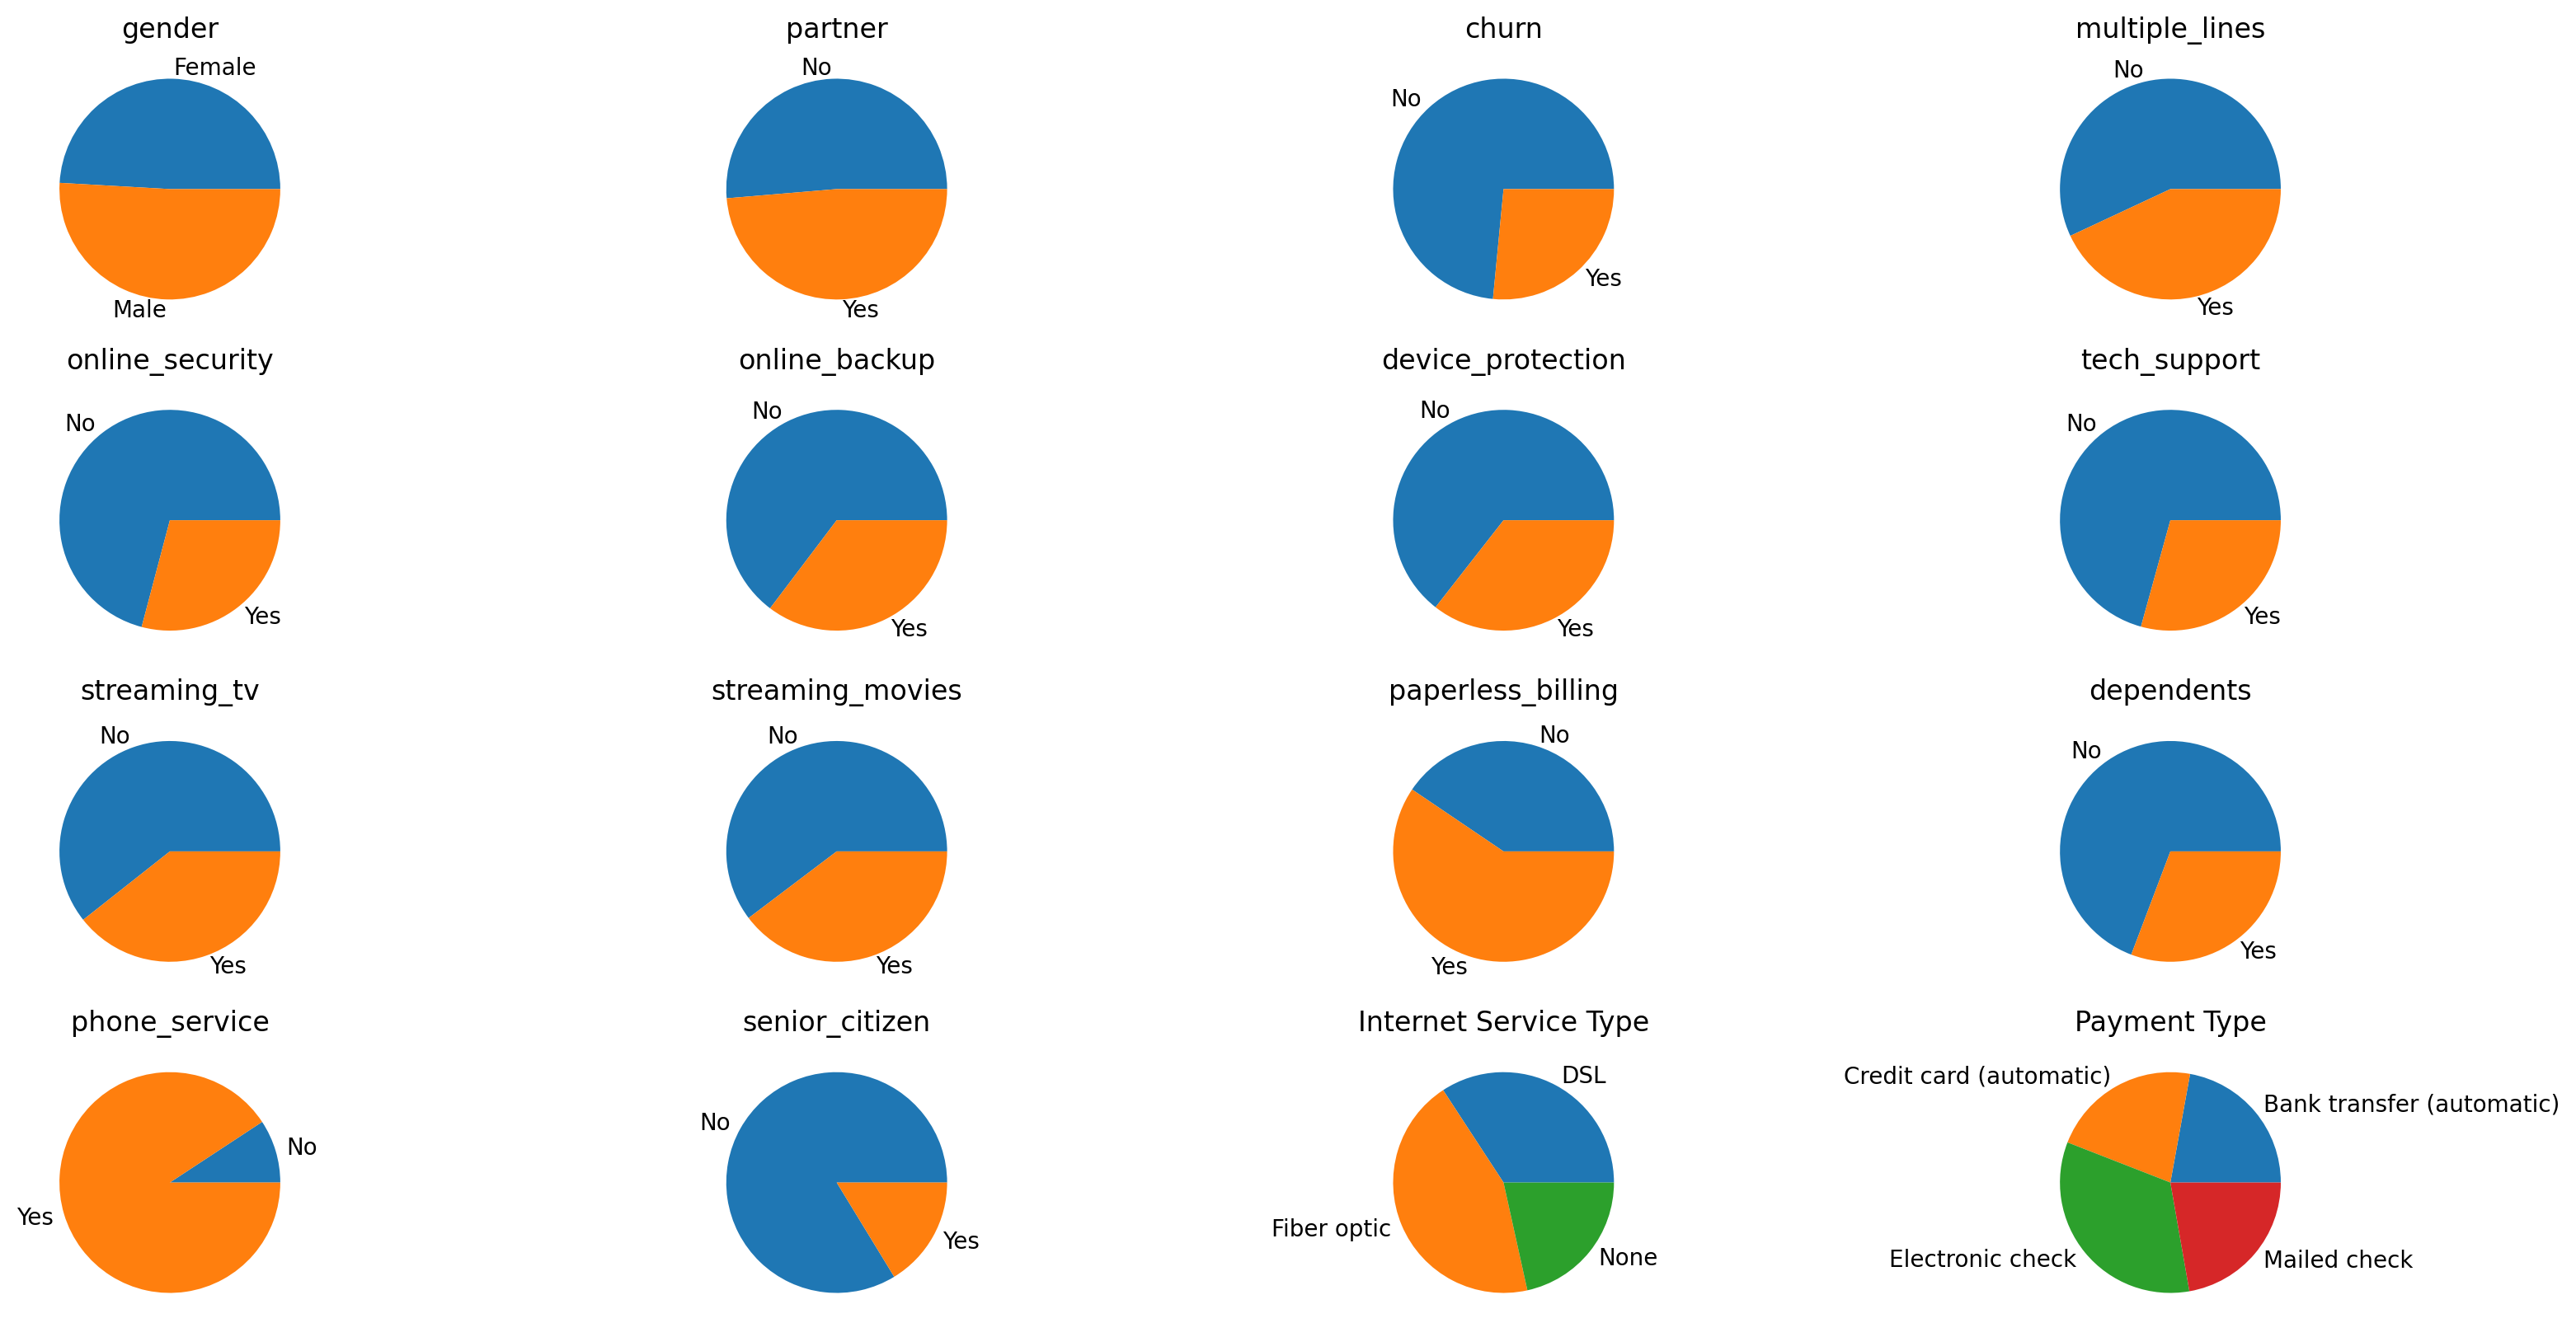

In [24]:
categorical = w.CAT_COLS + ['senior_citizen']
plt.figure(figsize=(20,10))
plt.subplot(4,4,1)
plt.title('gender')
plt.pie(train['is_male'].value_counts().sort_index(),labels=['Female','Male'])
for i,col in enumerate(categorical):
       plt.subplot(4,4,i+2)
       plt.title(col)
       plt.pie(train[col].value_counts().sort_index(), labels=['No','Yes'])
plt.subplot(4,4,15)
plt.title('Internet Service Type')
plt.pie(train.internet_service_type.value_counts().sort_index(), labels=w.IST_KEY)
plt.subplot(4,4,16)
plt.title('Payment Type')
plt.pie(train.payment_type.value_counts().sort_index(), labels= w.PAYMENT_KEY)
plt.show()


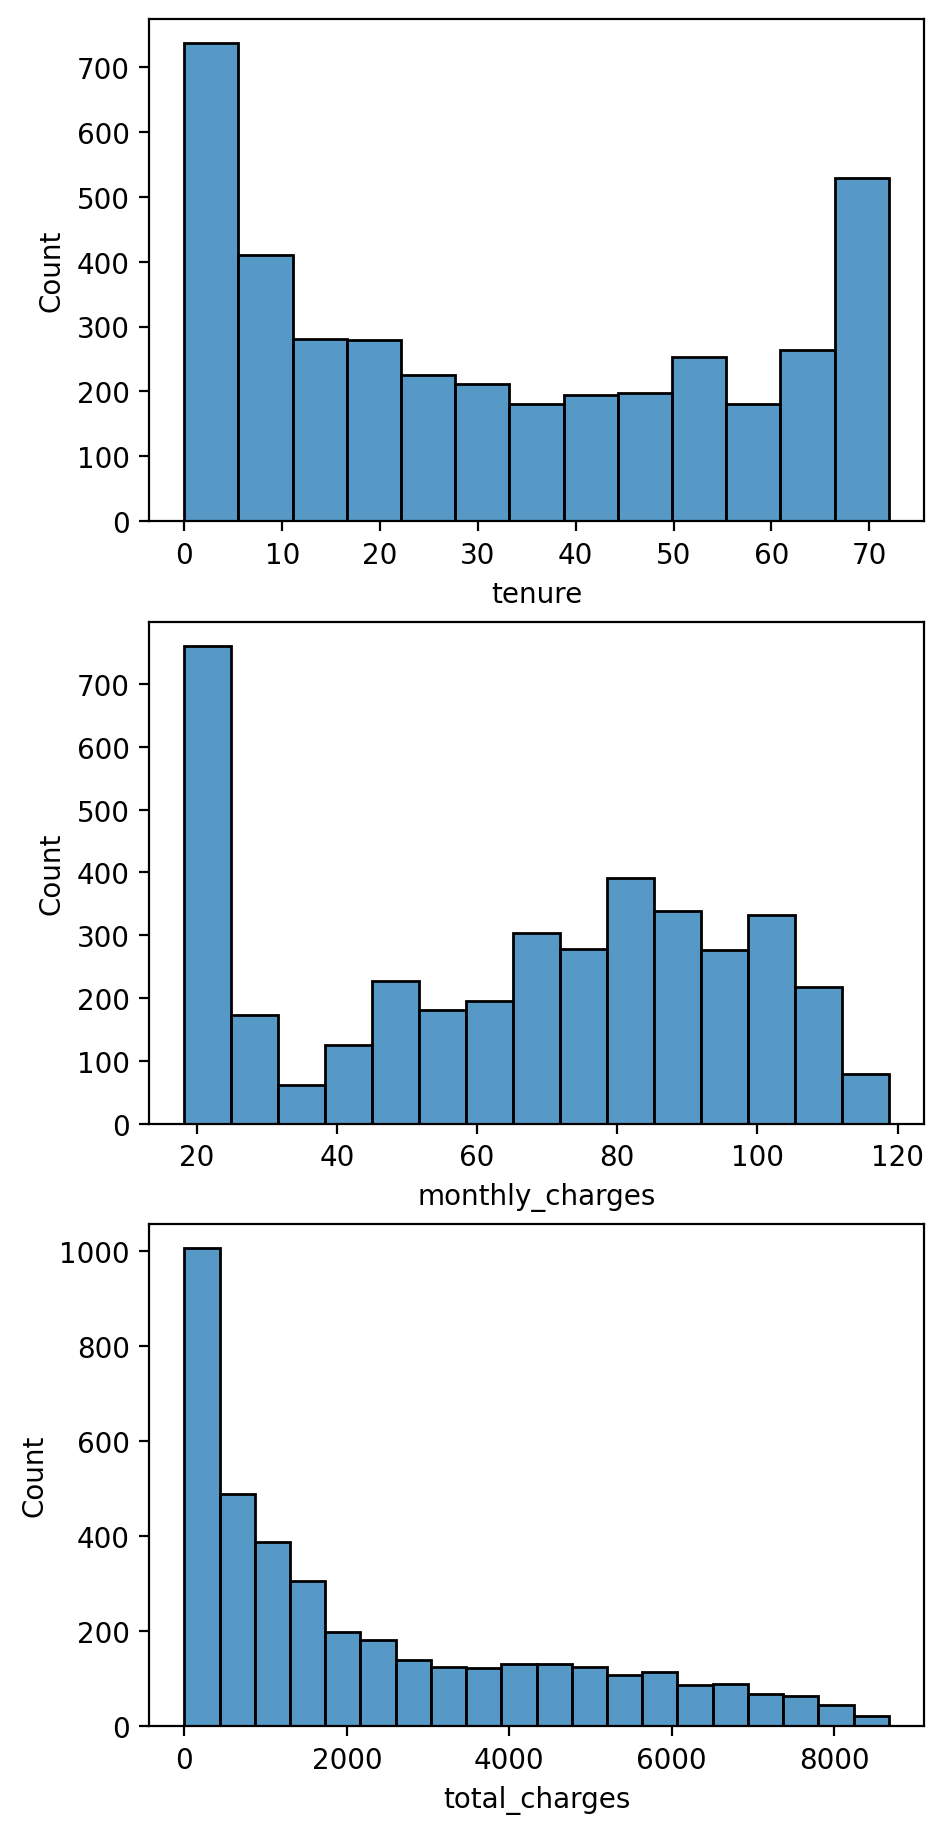

In [5]:
features = ['tenure','monthly_charges','total_charges']
plt.figure(figsize=(5,15))
for i,col in enumerate(features):
    plt.subplot(4,1,i+1)
    sns.histplot(data=train[col])

## Takeaways
customers who churn tend to have higher monthly charges and shorter tenure


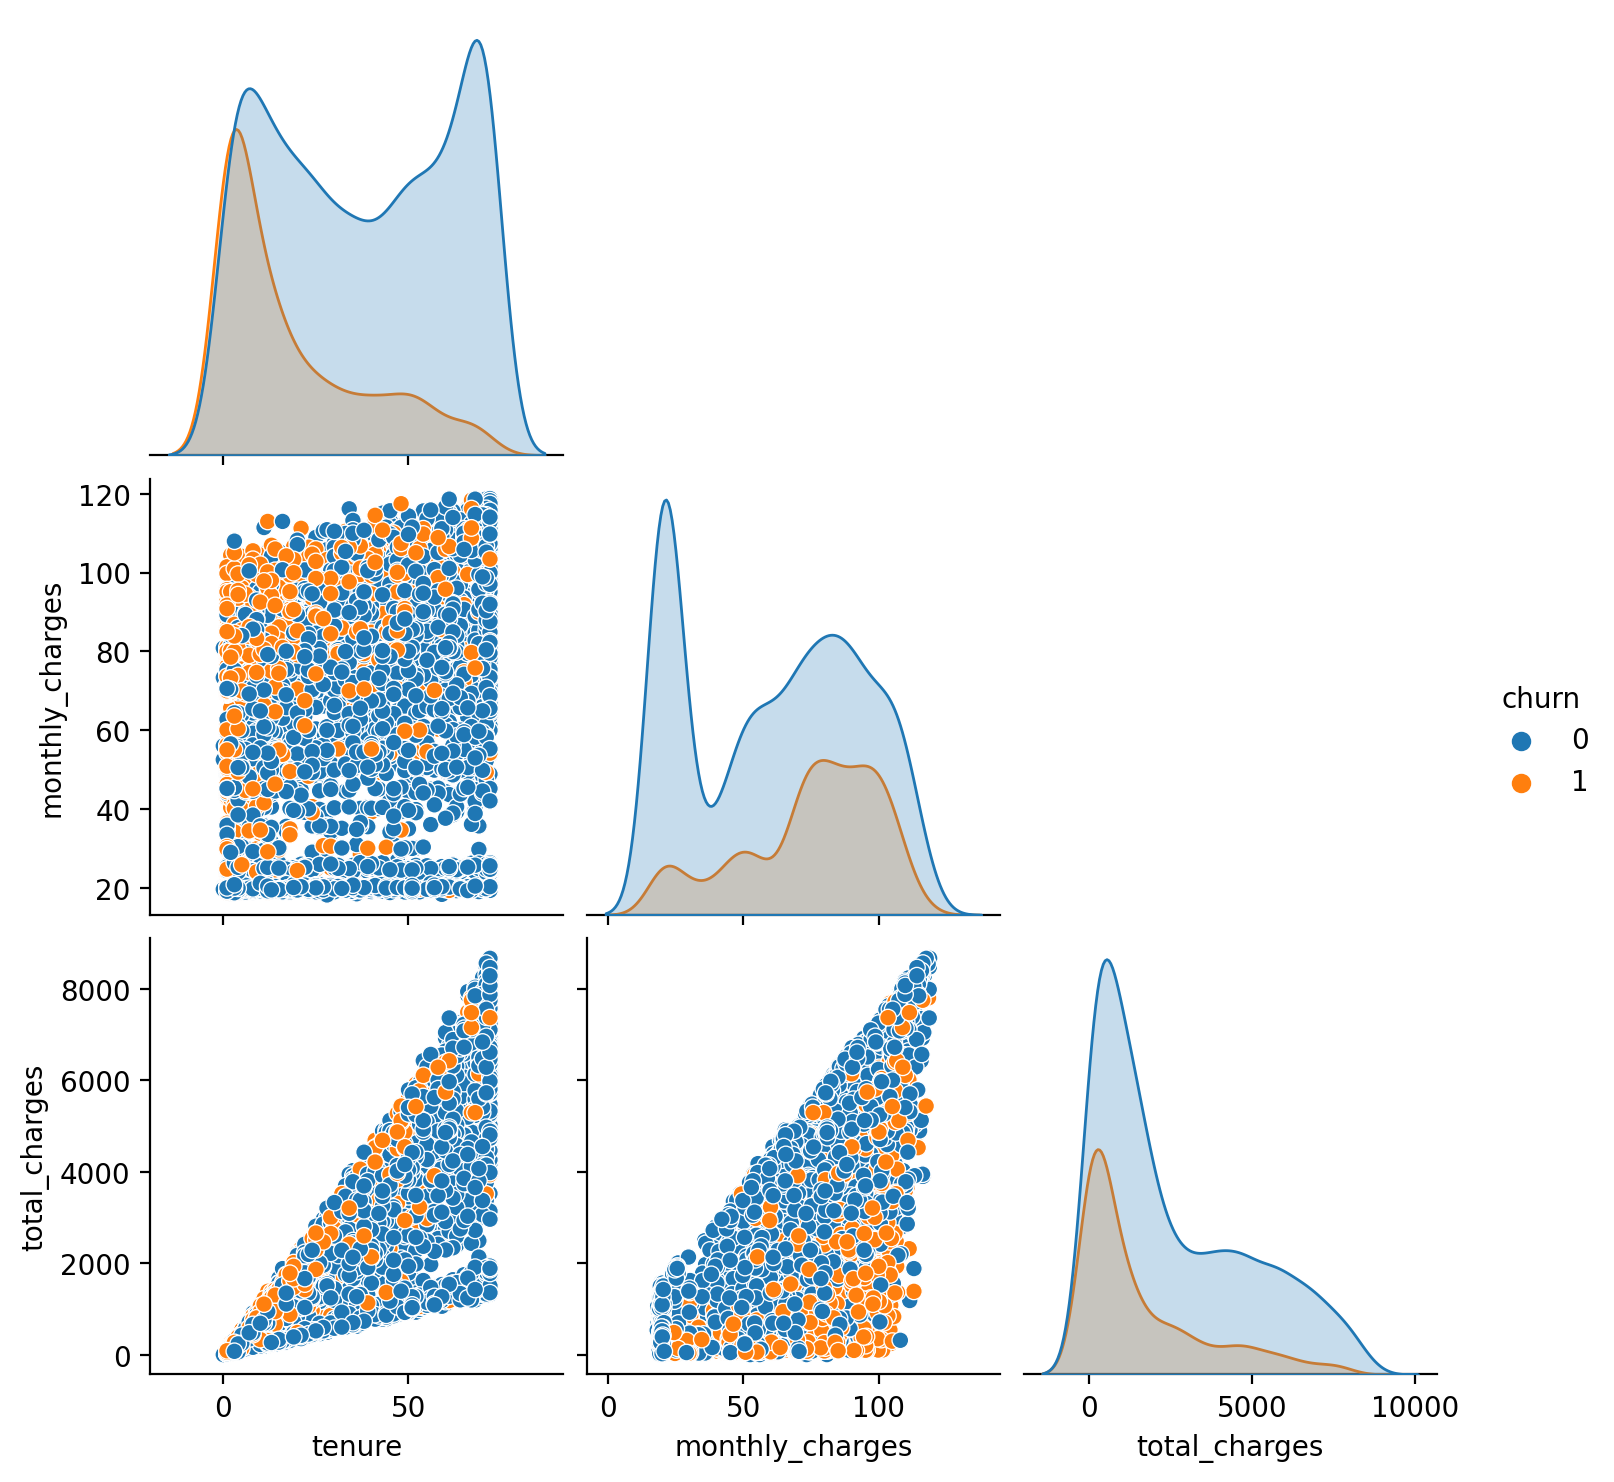

In [6]:
pair_vals = features + ['churn']
sns.pairplot(data=train[pair_vals], hue='churn',corner=True)

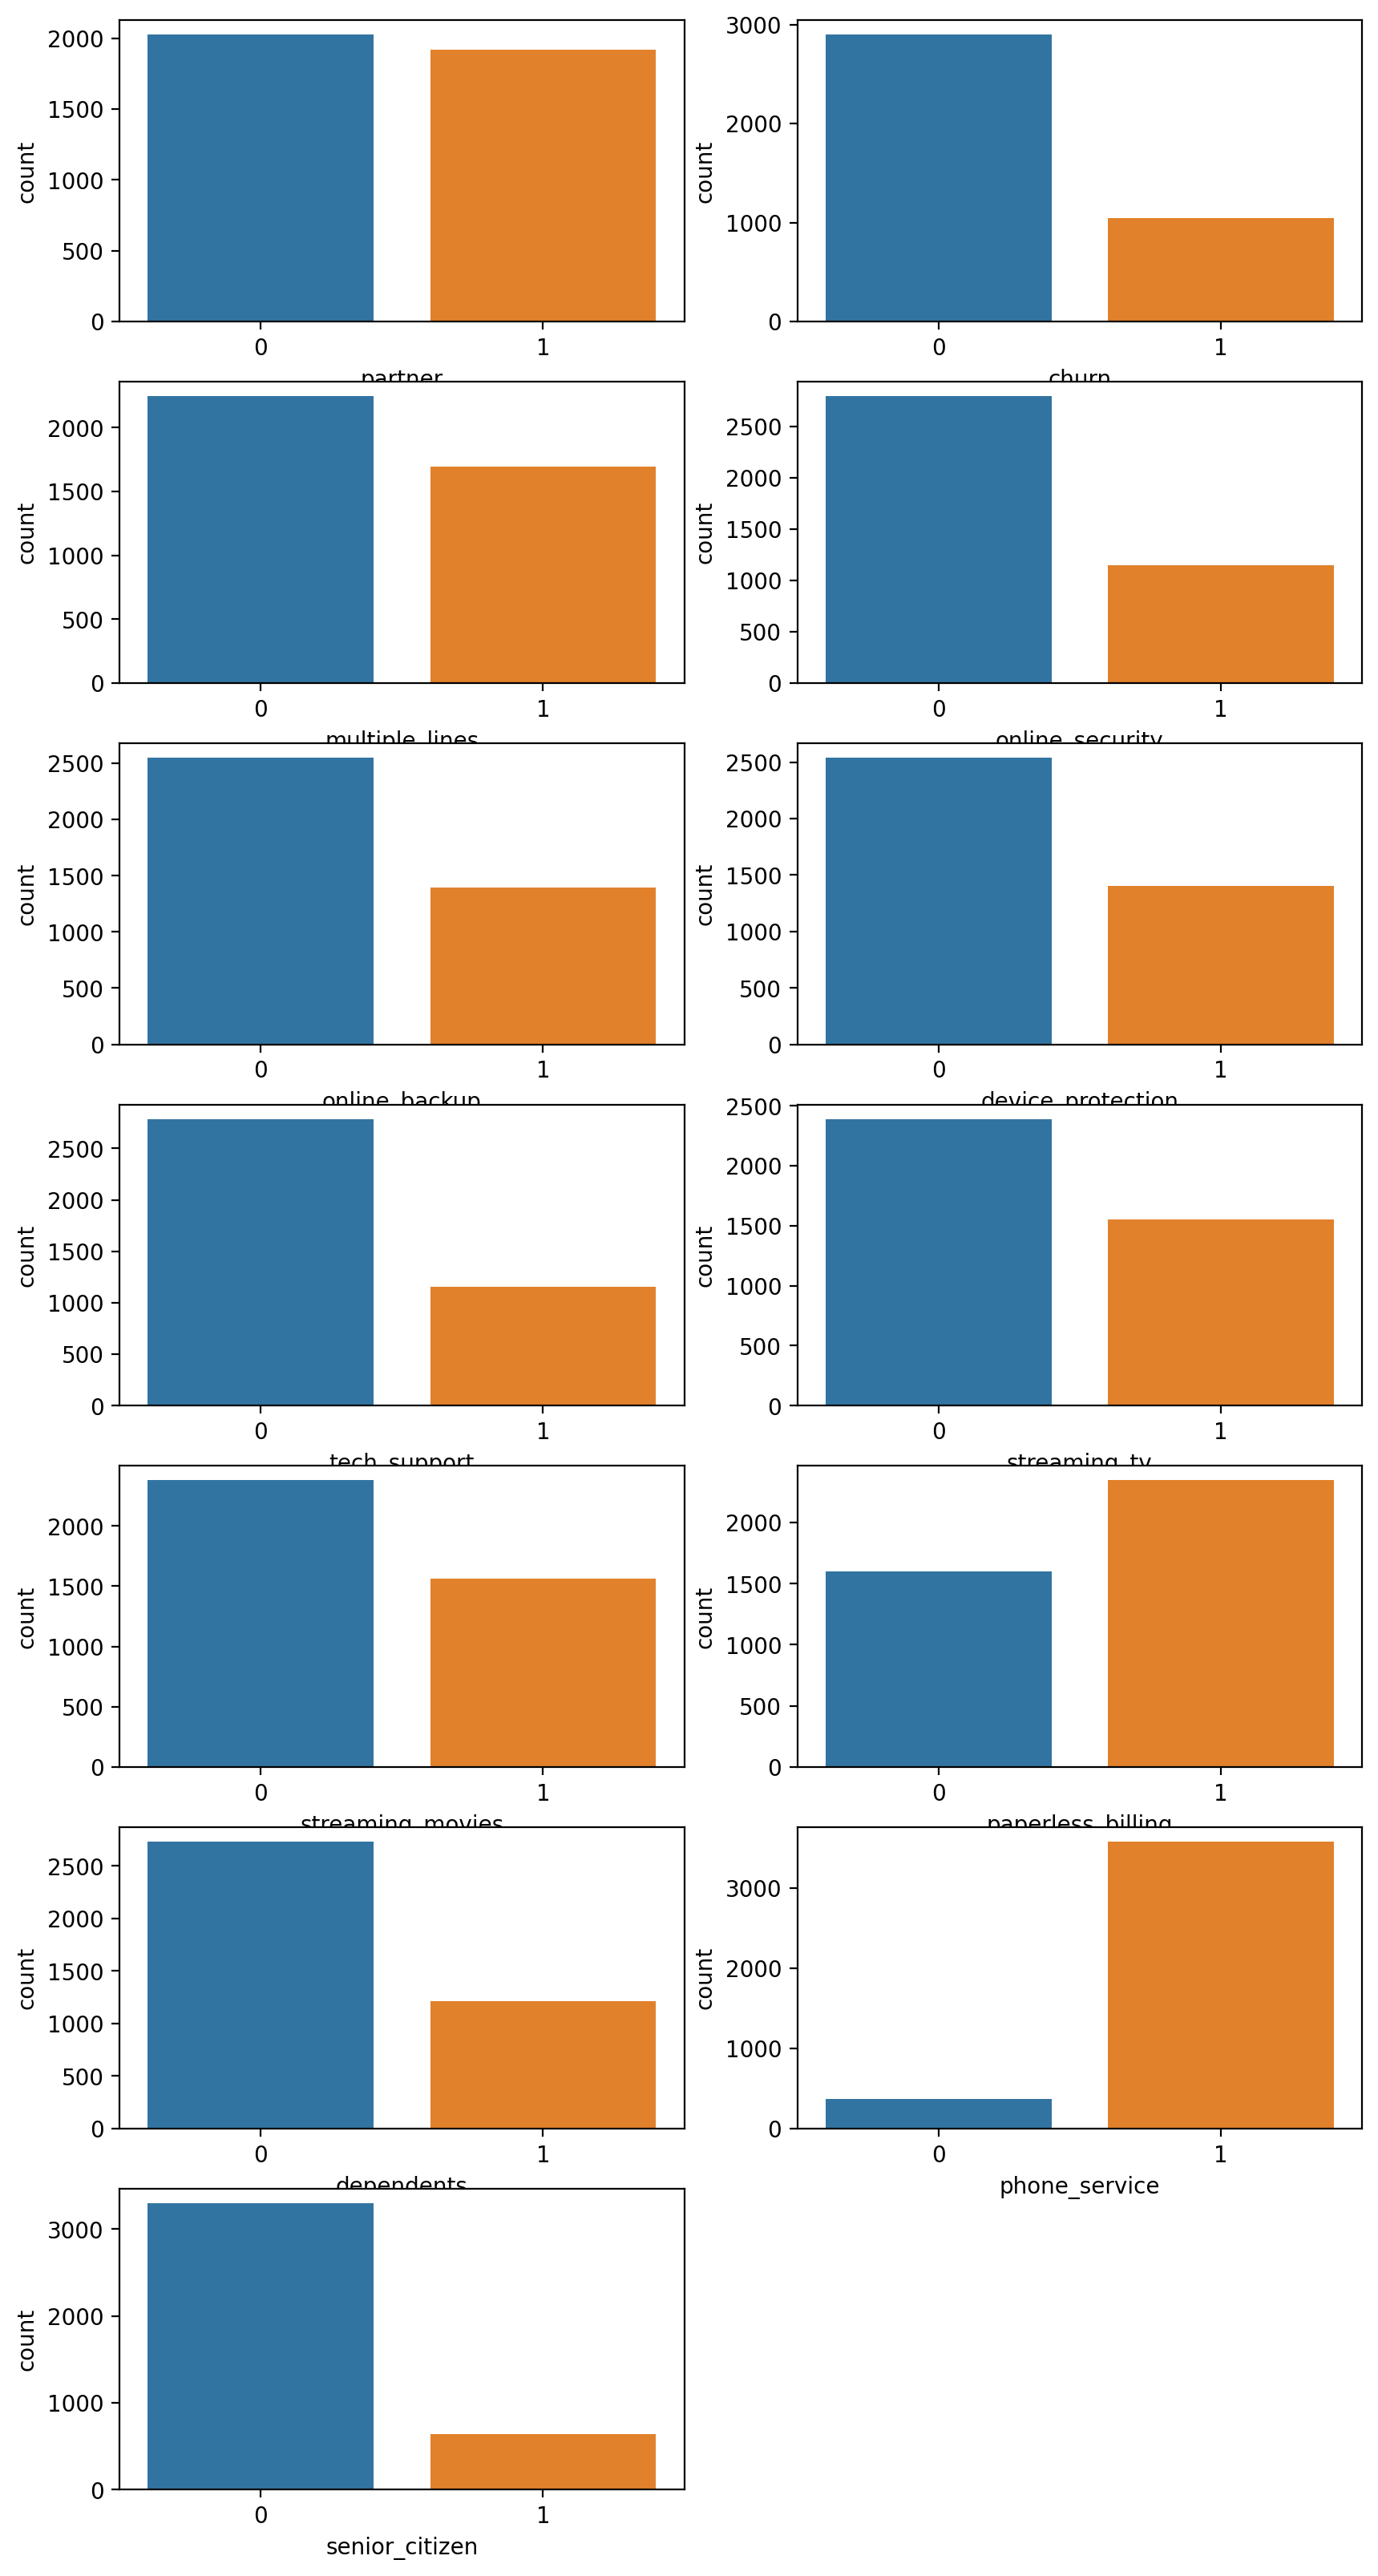

In [7]:
plt.figure(figsize=(10,20))
sbplt = len(categorical) //2 +1
for col,cat in enumerate(categorical):
    plt.subplot(sbplt,2,col+1)
    sns.countplot(data=train, x = cat,)
    

([<matplotlib.axis.XTick at 0x7fc0d5f43670>,
 [Text(0, 0, 'DSL'), Text(1, 0, 'Fiber optic'), Text(2, 0, 'None')])

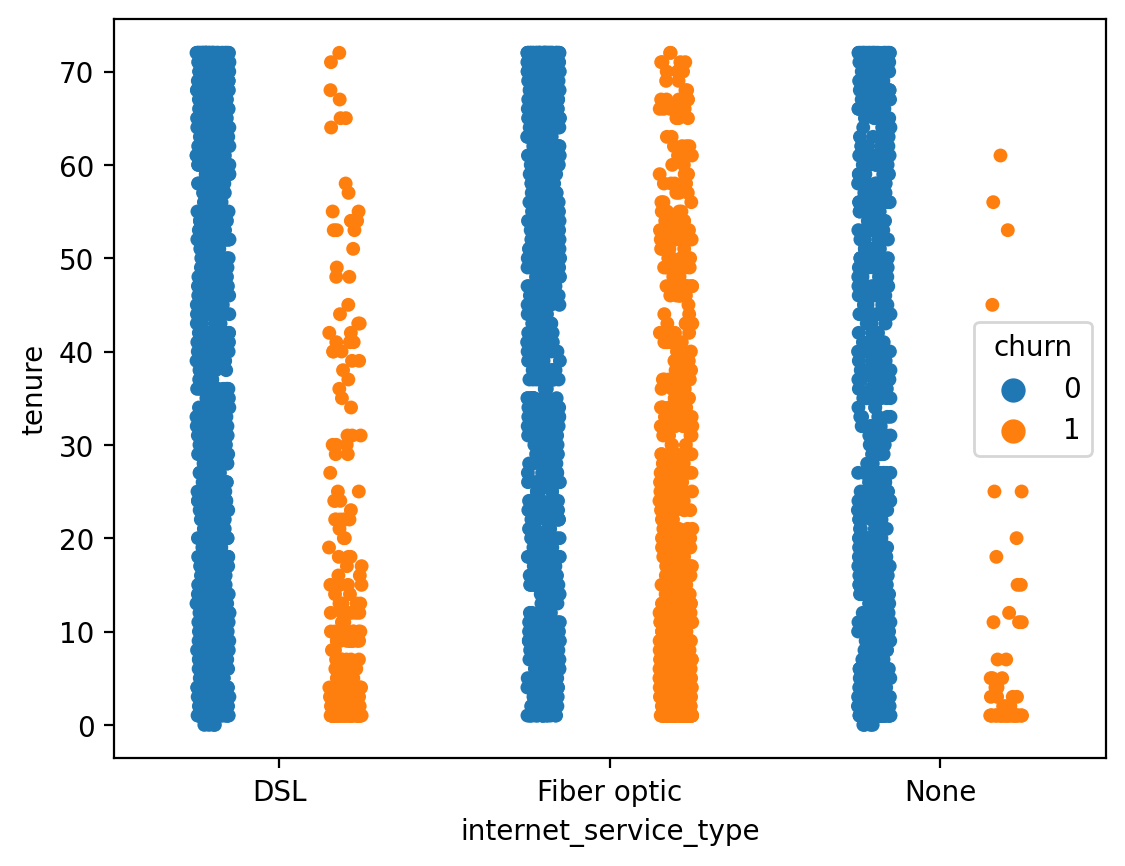

In [8]:
sns.stripplot(x=train.internet_service_type,y=train.tenure,hue=train.churn,dodge=True)
plt.xticks([0,1,2],w.IST_KEY)

([<matplotlib.axis.XTick at 0x7fc0d5fc3a90>,
 [Text(0, 0, 'DSL'), Text(1, 0, 'Fiber optic'), Text(2, 0, 'None')])

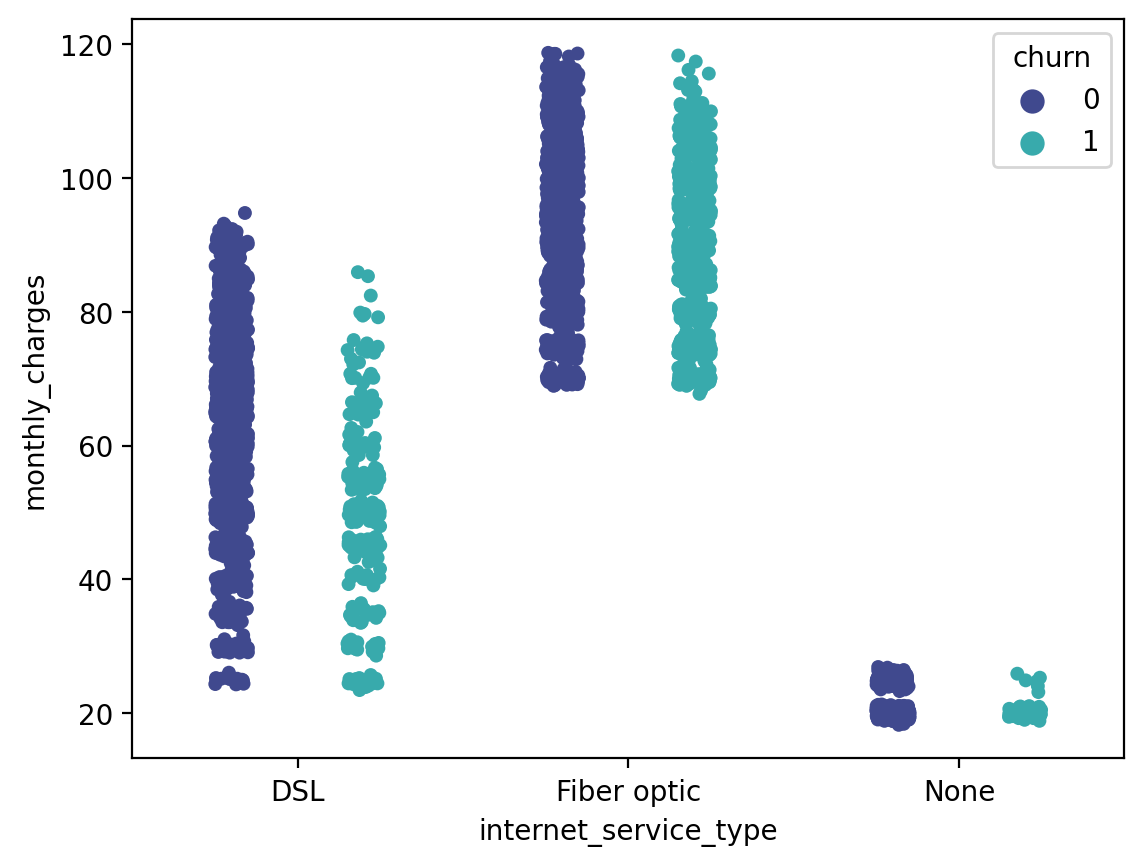

In [9]:
sns.stripplot(x=train.internet_service_type,y=train.monthly_charges, hue=train.churn,dodge=True,palette='mako')

plt.xticks([0,1,2],w.IST_KEY)

([<matplotlib.axis.XTick at 0x7fc0d642e4c0>,
 [Text(0, 0, 'DSL'), Text(1, 0, 'Fiber optic'), Text(2, 0, 'None')])

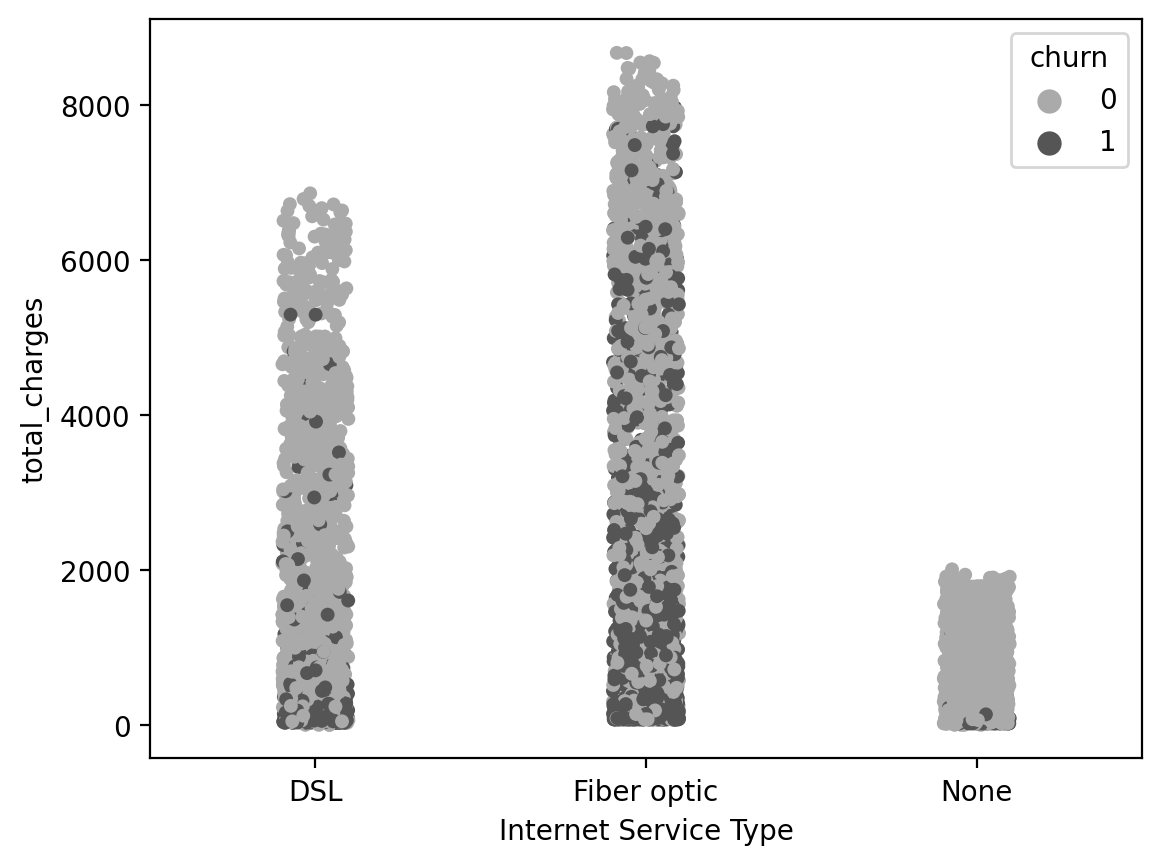

In [10]:
sns.stripplot(x=train.internet_service_type,y=train.total_charges, hue=train.churn, palette='binary')
plt.xlabel('Internet Service Type')
plt.xticks([0,1,2],w.IST_KEY)


([<matplotlib.axis.XTick at 0x7fc0d6497a00>,
 [Text(0, 0, 'DSL'), Text(1, 0, 'Fiber optic'), Text(2, 0, 'None')])

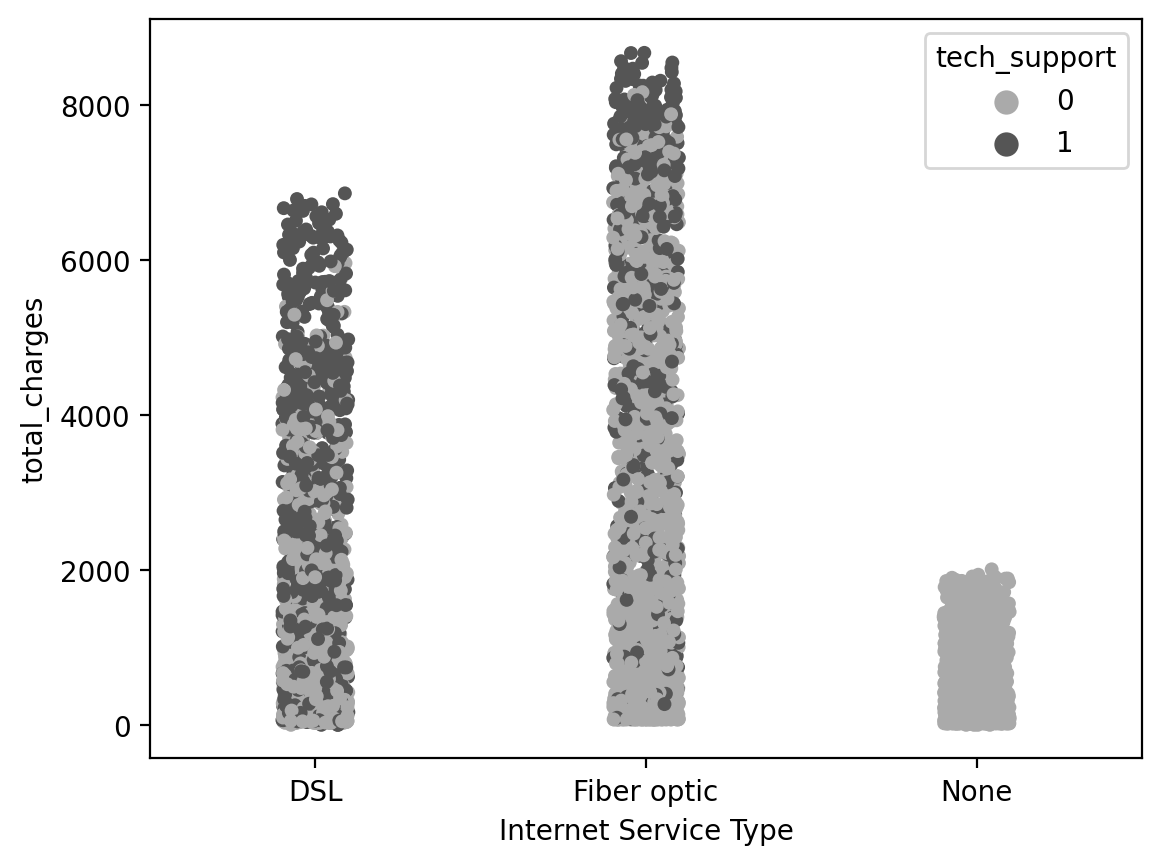

In [11]:
sns.stripplot(x=train.internet_service_type,y=train.total_charges, hue=train.tech_support, palette='binary')
plt.xlabel('Internet Service Type')
plt.xticks([0,1,2],w.IST_KEY)

# x_tran, y_train definition

In [12]:
x_train = train.drop(columns=['churn'])
y_train = train['churn']


In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, plot_confusion_matrix,ConfusionMatrixDisplay
tree = DecisionTreeClassifier()
mode = y_train.mode()[0]
predictions_tree = [mode for x in range(y_train.count())]
# Establish baseline accuracy
precision_init = precision_score(y_train,predictions_tree)
precision_tree = precision_init


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


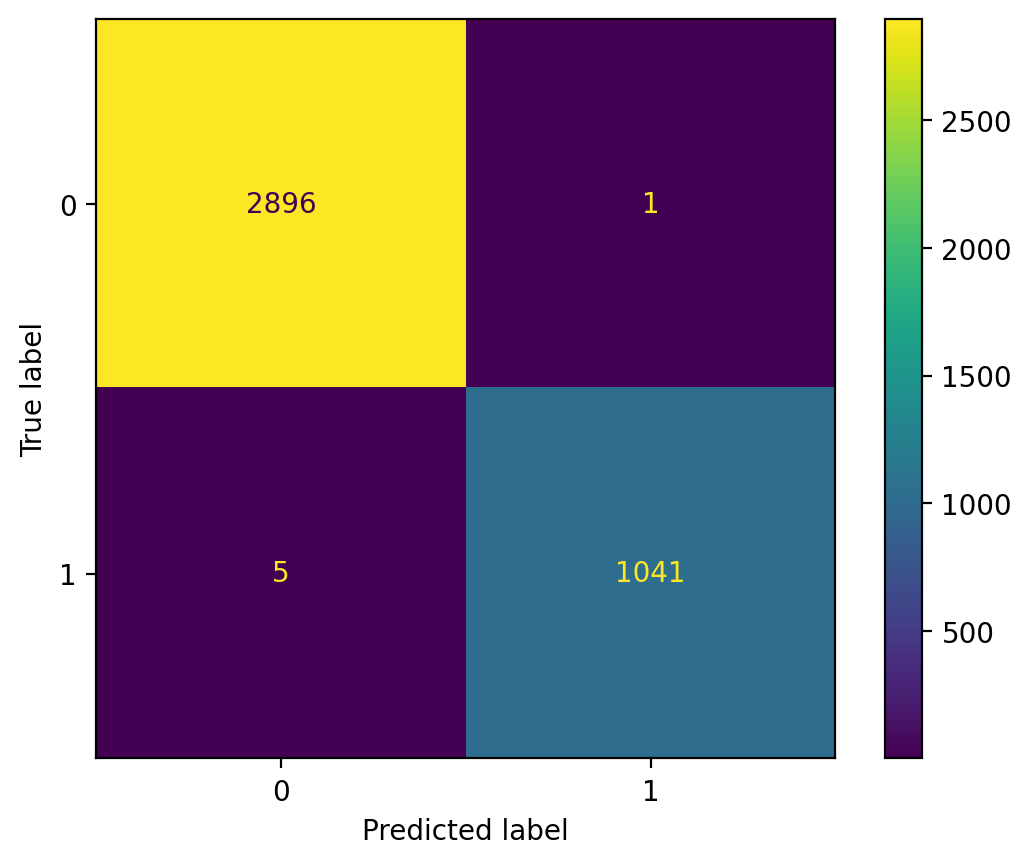

In [14]:
for x in [3,5,10,20,50]:
    ttree = DecisionTreeClassifier(max_depth=x, random_state=69)
    ttree.fit(x_train,y_train)
    predictions = ttree.predict(x_train)
    p = precision_score(y_train, predictions)
    if p > precision_tree:
        tree = ttree
        predictions_tree = predictions
ConfusionMatrixDisplay.from_predictions(y_train,predictions)
plt.show()


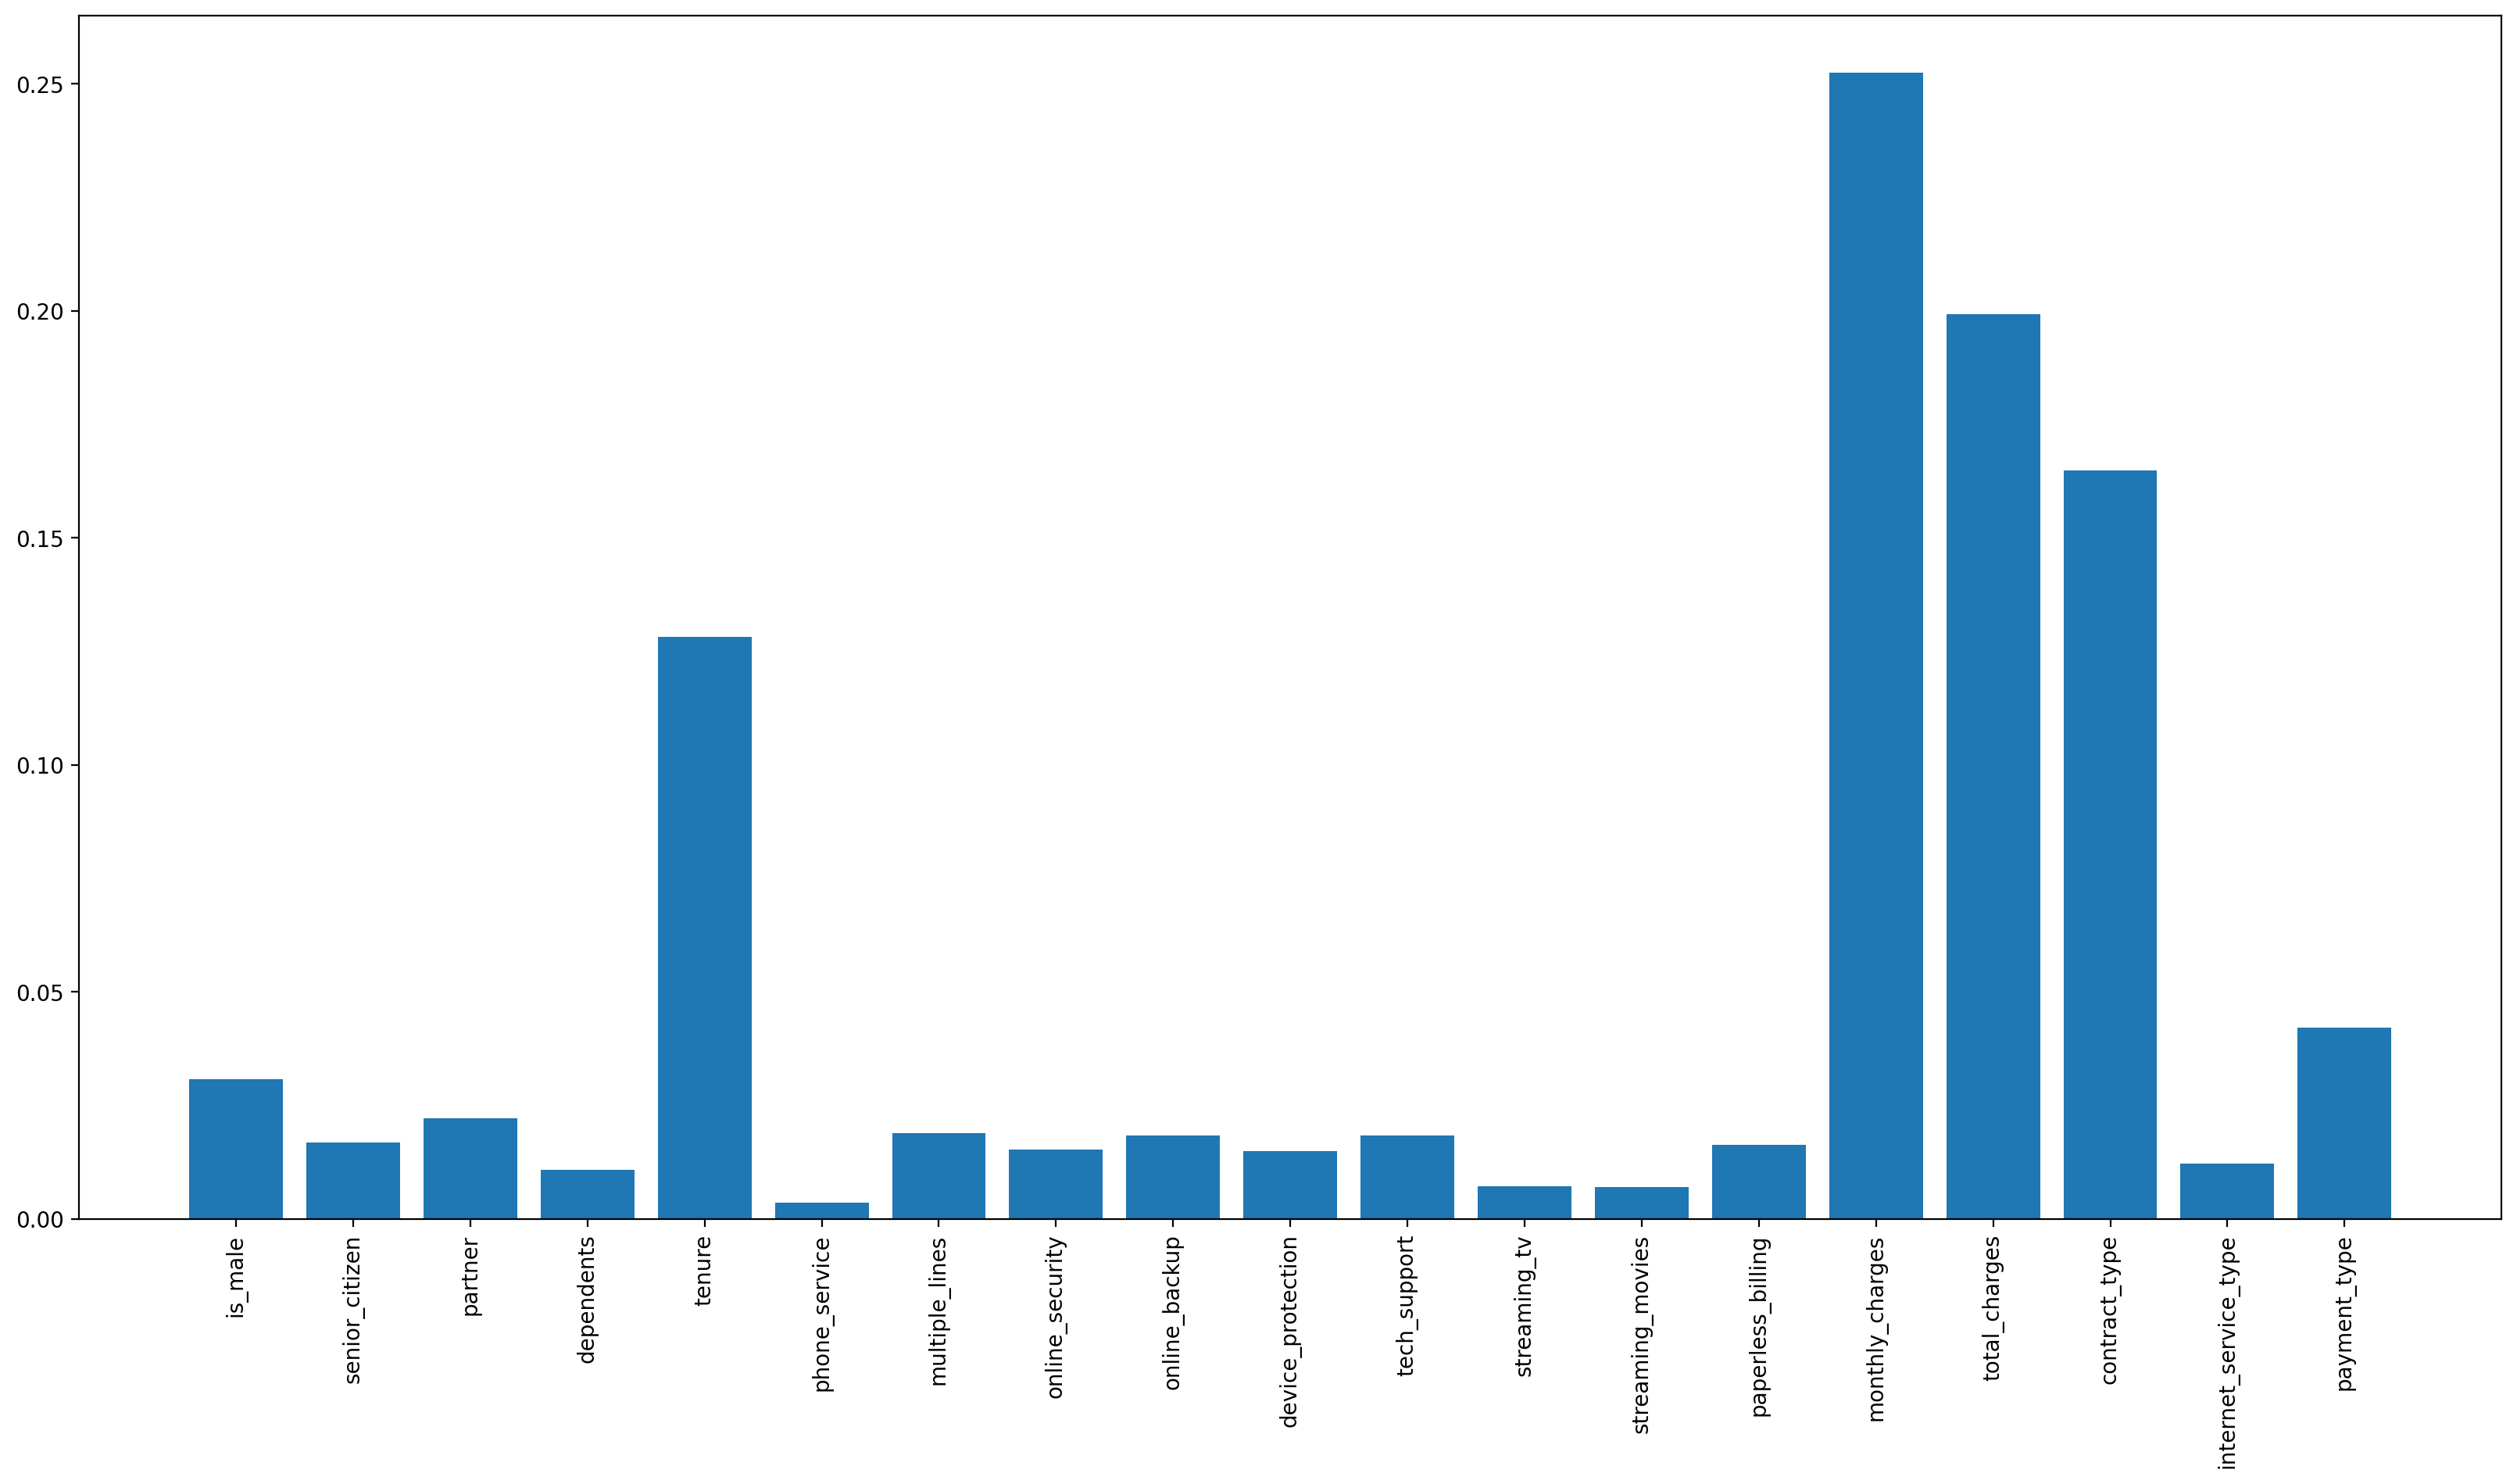

In [15]:
# print(fuc)
plt.figure(figsize=(20,10))
plt.bar(x_train.columns, tree.feature_importances_)
plt.xticks(rotation=90)
plt.show()

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


best precision at max_depth=24 at 0.9921722113502935.


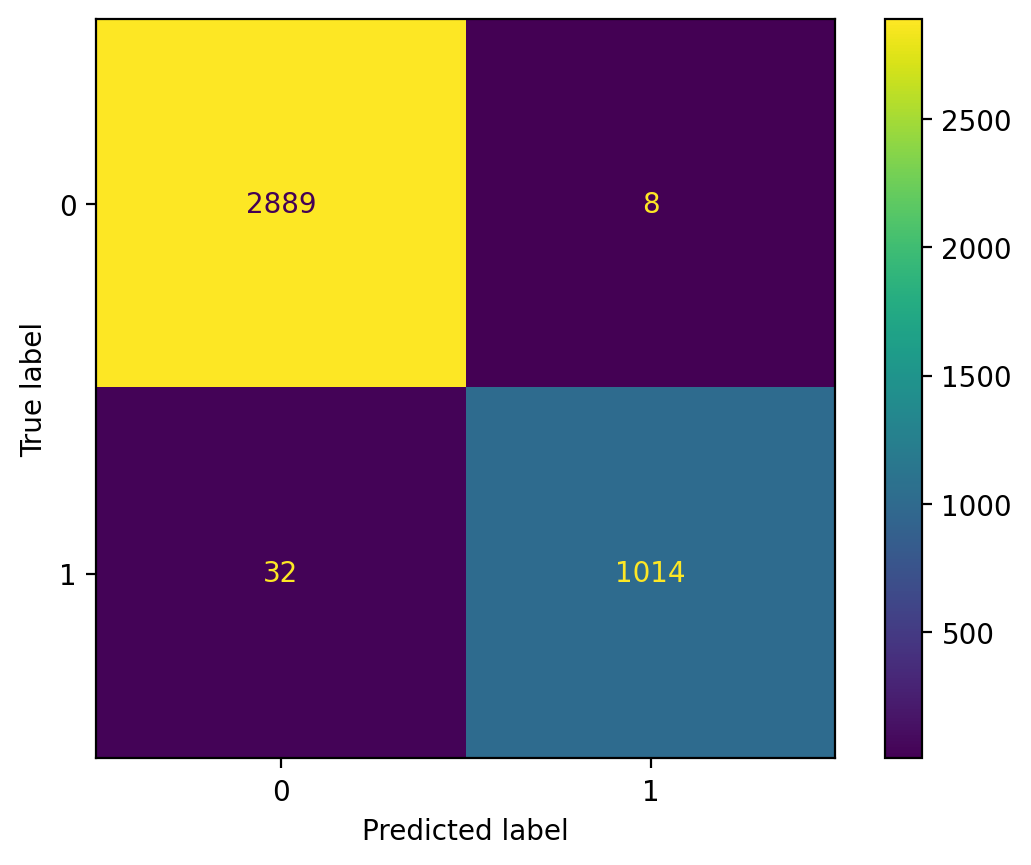

In [16]:
x_train = train[['tenure','monthly_charges','total_charges','contract_type','internet_service_type']]
y_train = train['churn']
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, plot_confusion_matrix,ConfusionMatrixDisplay
tree = DecisionTreeClassifier()
mode = y_train.mode()[0]
predictions_tree = [mode for x in range(y_train.count())]
# Establish baseline accuracy
precision_tree = 0
highest_precision = 3
precision_tree = precision_score(y_train,predictions_tree)
for x in range(3,35):
    tree = DecisionTreeClassifier(max_depth=x, random_state=69)
    tree.fit(x_train,y_train)
    predictions_tree = tree.predict(x_train)
    p = precision_score(y_train, predictions_tree)
    if p > precision_tree:
        precision_tree = p
        highest_precision = x
print(f'best precision at max_depth={highest_precision} at {precision_tree}.')
ConfusionMatrixDisplay.from_predictions(y_train,predictions_tree)


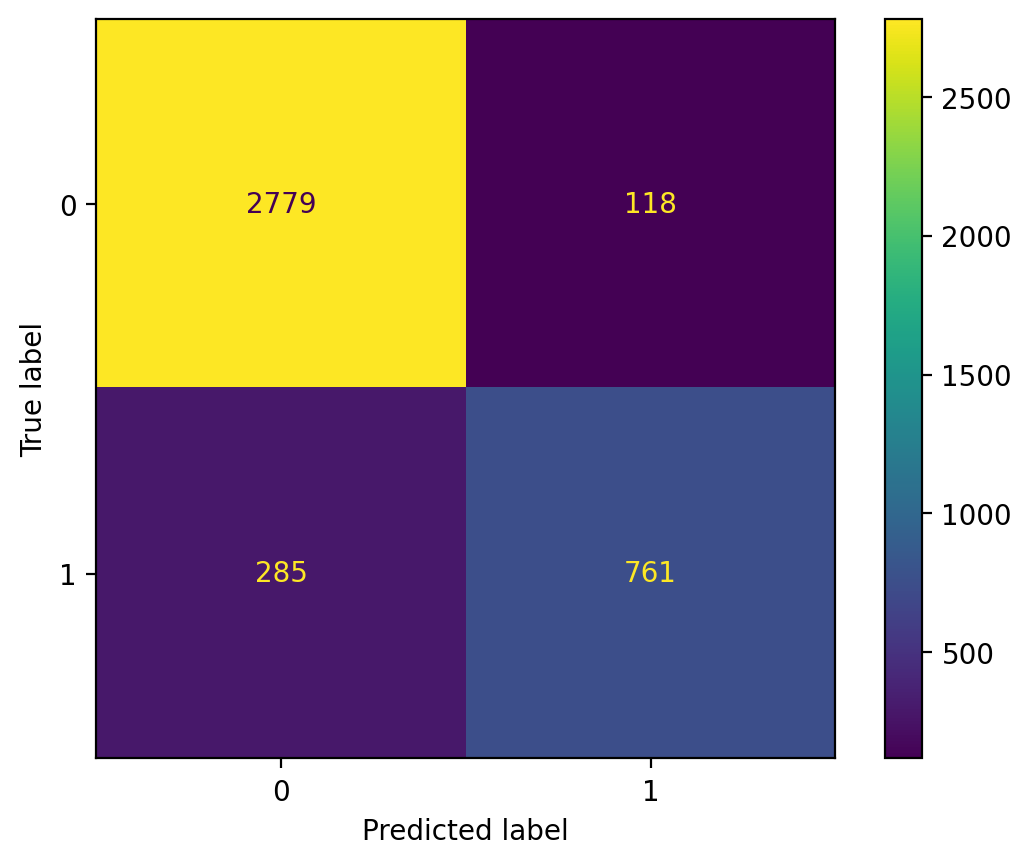

In [17]:
from sklearn.ensemble import RandomForestClassifier
min_leaves = [3,6,10,20,50]
max_depth = [3,5,10,20,50]
rf = RandomForestClassifier()
predictions_rf = [mode for x in range(y_train.count())]
precision_rf = precision_init
for min in min_leaves:
    for max in max_depth:
        trf = RandomForestClassifier(min_samples_leaf=min, max_depth=max)
        trf.fit(x_train,y_train)
        predictions = trf.predict(x_train)
        p = precision_score(y_train,predictions)
        if p > precision_rf:
            predictions_rf = predictions
            precision_rf = p
            rf = trf

ConfusionMatrixDisplay.from_predictions(y_train,predictions_rf)

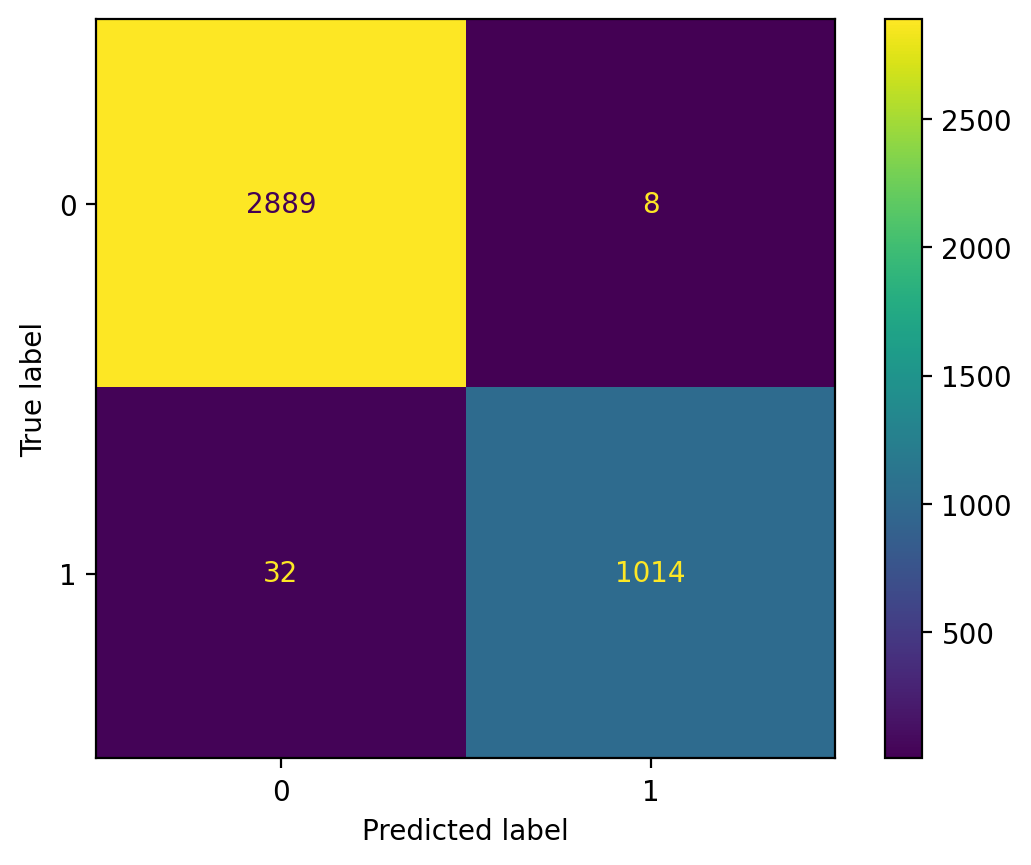

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k = 1
predicitions_knn = []
precision_knn = precision_init
for ik in [3,5,10]:
    tknn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    tknn.fit(x_train, y_train)
    predictions_knn = tknn.predict(x_train)
    p = precision_score(y_train, predictions_knn)
    if p > precision_knn:
        k = ik
        precision_knn = p
        knn = tknn
ConfusionMatrixDisplay.from_predictions(y_train, predictions_knn)
plt.show()


True


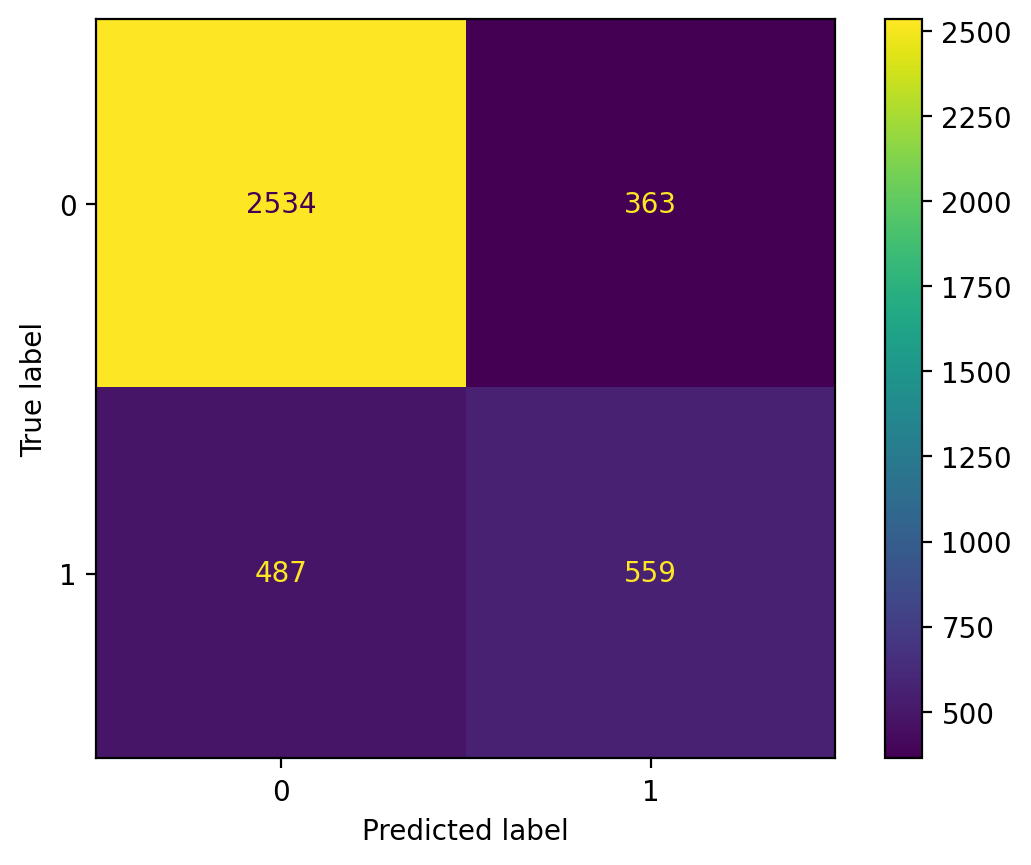

In [19]:
from sklearn.linear_model import LogisticRegression
loggins = LogisticRegression(C=.95,random_state=69)
loggins.fit(x_train, y_train)
predictions_logreg = loggins.predict(x_train)
print(precision_score(y_train,predictions_logreg) > precision_init)
ConfusionMatrixDisplay.from_predictions(y_train, predictions_logreg)

# Validation

<Figure size 2000x2000 with 0 Axes>

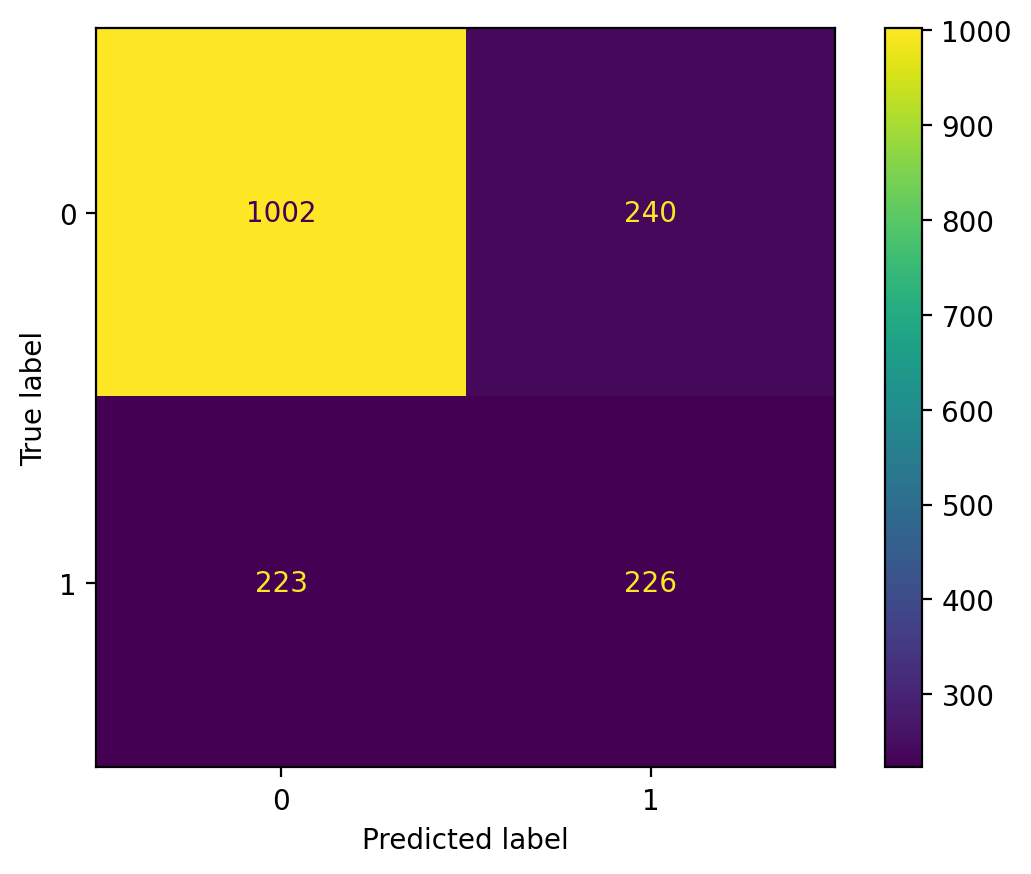

In [20]:
y_valid = validate['churn']
x_valid = validate[['tenure','monthly_charges','total_charges','contract_type','internet_service_type']]
plt.figure(figsize=(20,20))
valid_tree = tree.predict(x_valid)
ConfusionMatrixDisplay.from_predictions(y_valid,valid_tree)


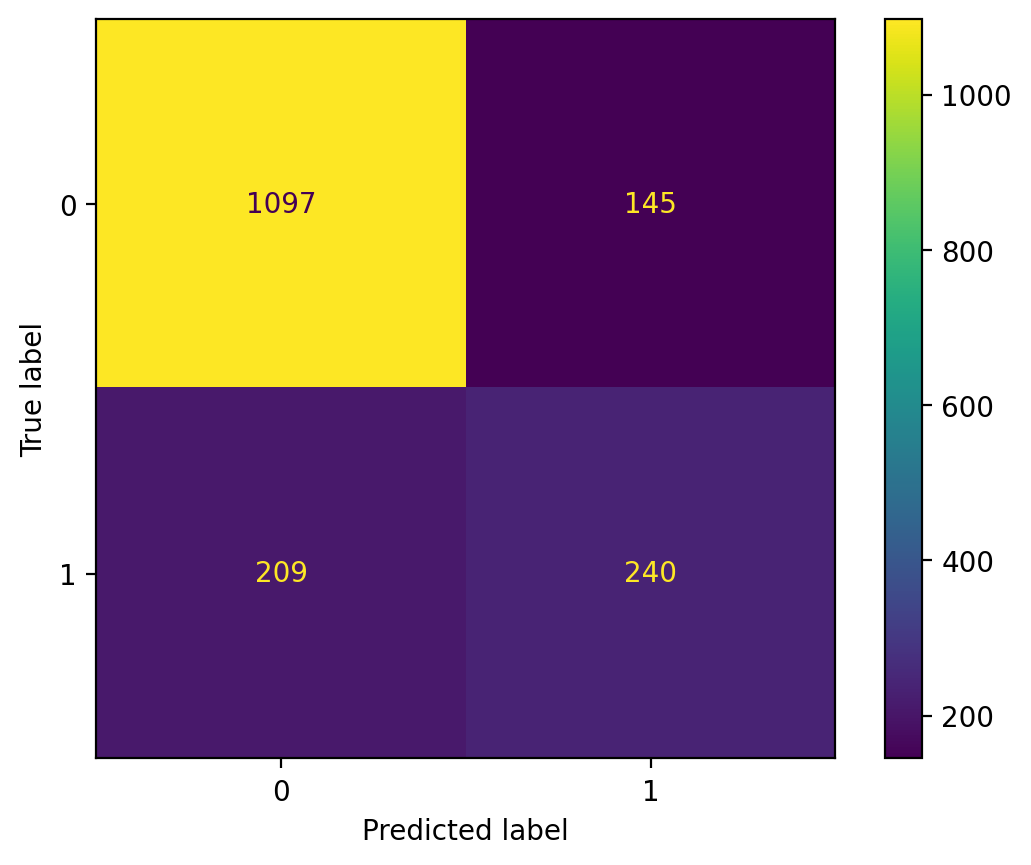

In [21]:
valid_rf = rf.predict(x_valid)
ConfusionMatrixDisplay.from_predictions(y_valid,valid_rf)


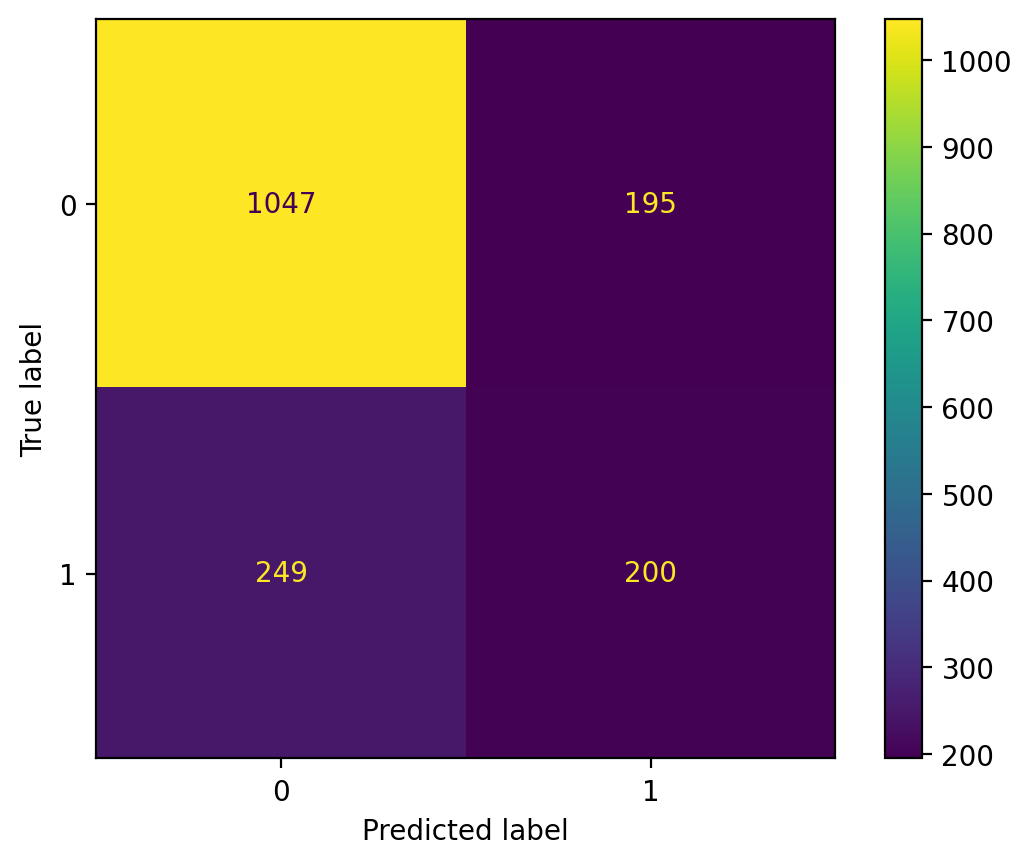

In [22]:
valid_knn = knn.predict(x_valid)
ConfusionMatrixDisplay.from_predictions(y_valid,valid_knn)


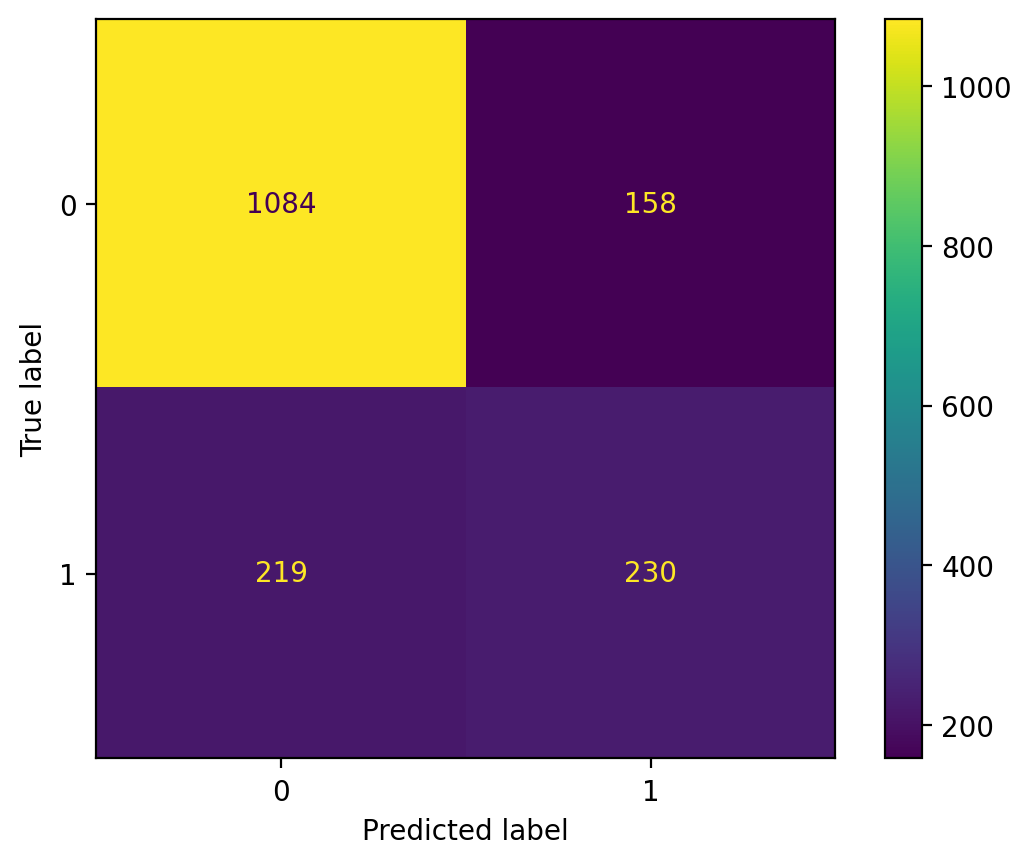

In [23]:
valid_logreg = loggins.predict(x_valid)
ConfusionMatrixDisplay.from_predictions(y_valid,valid_logreg)
plt.show()


In [29]:
for t in train.columns:
    print(f'**{t}** |')

**is_male** |
**senior_citizen** |
**partner** |
**dependents** |
**tenure** |
**phone_service** |
**multiple_lines** |
**online_security** |
**online_backup** |
**device_protection** |
**tech_support** |
**streaming_tv** |
**streaming_movies** |
**paperless_billing** |
**monthly_charges** |
**total_charges** |
**churn** |
**contract_type** |
**internet_service_type** |
**payment_type** |
